In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


## Random Forest básico (con variables dummy y nada más)

In [2]:
df_encoded = pd.read_csv("qll_limpio_encoded.csv")

In [3]:
X = df_encoded.drop(columns=["rating", "id_lector", "id_libro", "nombre", "titulo", "editorial", "autor","isbn"])
y = df_encoded["rating"]


In [4]:
non_numeric = X.select_dtypes(exclude=['number']).columns
print("Columnas con texto o no numéricas:")
print(non_numeric)

Columnas con texto o no numéricas:
Index([], dtype='object')


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(
    n_estimators=100,  
    max_depth=5,     
    n_jobs=-1,         
    random_state=42
)

rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
y_pred_train = rf.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f"RMSE train: {rmse_train:.4f}")
print(f"RMSE test: {rmse:.4f}")


RMSE train: 1.8199
RMSE test: 1.8171


count    468868.000000
mean          7.254430
std           1.836229
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          10.000000
Name: rating, dtype: float64


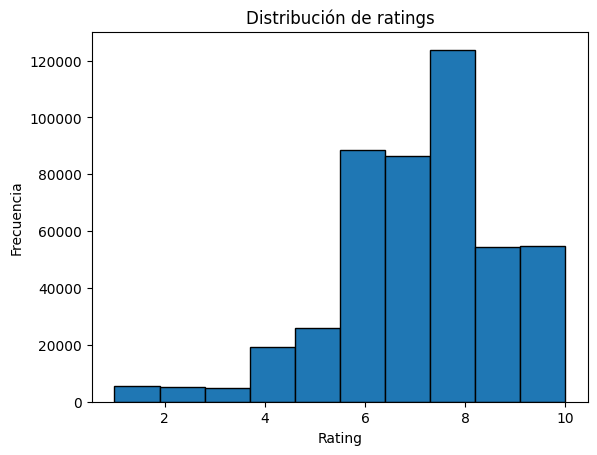

In [9]:
import matplotlib.pyplot as plt

print(df_encoded["rating"].describe())

plt.hist(df_encoded["rating"], bins=10, edgecolor='k')
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.title("Distribución de ratings")
plt.show()

In [10]:
y_mean_pred = np.full_like(y_test, y_train.mean())
rmse_naive = np.sqrt(mean_squared_error(y_test, y_mean_pred))
print(f"RMSE baseline (predice siempre la media): {rmse_naive:.4f}")

RMSE baseline (predice siempre la media): 1.8514
